In [1]:
import random
import sys
from typing import Literal

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader, Dataset
from torchmetrics import Accuracy
import lime
import numpy as np
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.append("src")

import utils
import tsaug

In [5]:
train = utils.read_data("train")
test = utils.read_data("test")

In [7]:
train_sequences = [(train[key]['ts'].to_numpy(), 1 if train[key]['class'] == "a" else 0) for key in train]
test_sequences = [(test[key]['ts'].to_numpy(), 1 if test[key]['class'] == "a" else 0) for key in test]
random.shuffle(test_sequences)
val_sequences = test_sequences[:100]
test_sequences = test_sequences[100:]

In [71]:
from tsaug.visualization import plot

In [340]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse, AddNoise, Resize
my_augmenter = (
    Crop(size=256)  # random crop subsequences with length 300
    + Quantize(n_levels=[30, 50])  # random quantize to 10-, 20-, or 30- level sets
    + Drift(max_drift=(0.3, 0.7)) @ 0.8  # with 80% probability, random drift the signal up to 10% - 50%
    #+ Reverse() @ 1  # with 50% probability, reverse the sequence
    + AddNoise(scale=0.05)
)

In [341]:
X1 = np.array(train_sequences[0][0]).T

In [342]:
newX1 = my_augmenter.augment(X1)

In [343]:
newX1.shape

(64, 256)

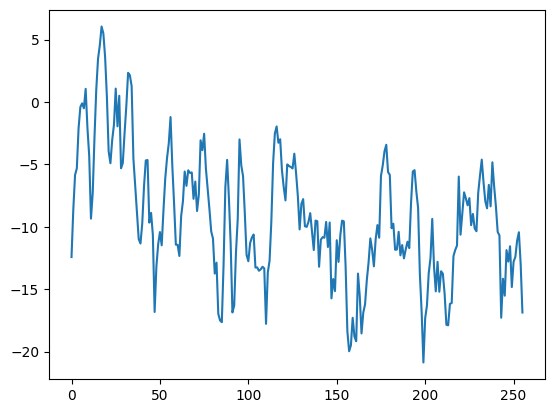

In [344]:
plt.plot(newX1[0])

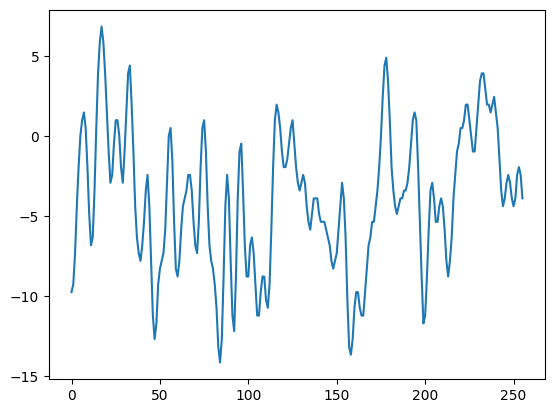

In [345]:
plt.plot(X1[0])